In [1]:
import math
import numpy as np
from sklearn.datasets import load_iris
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = load_iris()

In [3]:
setosa_data = data.data[:50, :]
versicolor_data = data.data[50:100, :]
virginica_data = data.data[100:, :]

In [4]:
np.random.shuffle(setosa_data)
np.random.shuffle(versicolor_data)
np.random.shuffle(virginica_data)

In [5]:
setosa_data_train = setosa_data[:40]
setosa_data_test = setosa_data[40:]

versicolor_data_train = versicolor_data[:40]
versicolor_data_test = versicolor_data[40:]

virginica_data_train = virginica_data[:40]
virginica_data_test = virginica_data[40:]

In [6]:
X_train = []
X_train.extend(setosa_data_train)
X_train.extend(versicolor_data_train)
X_train.extend(virginica_data_train)

# 1 if setosa class, 0 else
y_train = [1 for i in range(40)]
y_train.extend([0 for i in range(40)])
y_train.extend([0 for i in range(40)])

X_test = []
X_test.extend(setosa_data_test)
X_test.extend(versicolor_data_test)
X_test.extend(virginica_data_test)

y_test = [1 for i in range(10)]
y_test.extend([0 for i in range(10)])
y_test.extend([0 for i in range(10)])

n_dims = 4

In [7]:
class LogisticRegression:
    def __init__(self, n_dims):
        self.thetas = [0 for i in range(n_dims)]
        self.alpha = 0.001
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def sigmoid(self, z):
        return 1.0 / (1 + math.e**(-z))
    
    def confugureSettings(self, n_iters):
        for i in range(n_iters):
            for j in range(len(self.X_train)):
                x = self.X_train[j]
                predicted = self.predictElement(x)
                delta = self.y_train[j] - predicted
                for k, theta in enumerate(self.thetas):
                    self.thetas[k] += self.alpha * delta * x[k]
                    
    def predictElement(self, x):
        return self.sigmoid(np.dot(np.transpose(x), self.thetas))
    
    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self.predictElement(x))
        return predicted

In [8]:
n_iters = 500

In [9]:
logisticRegression = LogisticRegression(n_dims)
logisticRegression.fit(X_train, y_train)
logisticRegression.confugureSettings(n_iters)

In [10]:
predicted = logisticRegression.predict(X_test)

In [11]:
def getROCPoint(classes):
    NP = [20, 10]
    TP = 0
    FP = 0
    for i in range(len(X_test)):
        if classes[i] is 1:
            if y_test[i] is 1:
                TP += 1
            else:
                FP += 1
    return (1.0 * FP / NP[0], 1.0 * TP / NP[1])

In [12]:
FPRs = []
TPRs = []
for threshold in np.arange(1, 0.0, -0.00001):
    classes = []
    for p in predicted:
        classes.append(0 if p < threshold else 1)
    point = getROCPoint(classes)
    FPRs.append(point[0])
    TPRs.append(point[1])

In [13]:
def countROCAUC(FPRs, TPRs):
    area = 0.0
    for i in range(len(FPRs) - 1):
        area += (FPRs[i + 1] - FPRs[i]) * (TPRs[i + 1] + TPRs[i]) / 2.0
    return area

In [14]:
# ROCAUC:
countROCAUC(FPRs, TPRs)

1.0

<module 'matplotlib.pyplot' from '/home/yulya/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

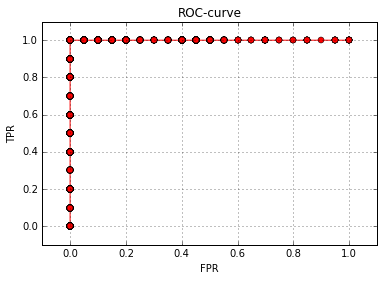

In [15]:
plt.plot(FPRs, TPRs, color="red", marker="o")
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.title(u'ROC-curve')
plt.xlabel(u'FPR')
plt.ylabel(u'TPR')
plt.grid()
plt

In [16]:
plt.savefig('ROC.png', format = 'png')